## Digit Recognition - SVM

### Objective :

 - To explore the MNIST dataset and build an SVM classifier model to classify handwritten digits.
 - A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.
 - The goal is to develop a model using Support Vector Maching that can correctly identify the digit (between 0-9) based on the pixel values given as features. Thus, it is a 10-class classification problem 

### Data Description :
- MNIST data which is a large database of handwritten digits.The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label.  
- Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features.

### Note :
- Since the training dataset is quite large (42,000 labelled images), it would take a lot of time for training an SVM on the full MNIST data, so it's better to sub-sample the data for training (10-20% of the data should be enough to achieve decent accuracy). Also, running a GridSearchCV() may take hours if you use a large value of k (fold-CV) such as 10 and a wide range of hyperparameters; k = 5 should be sufficient.

### Data Understanding

In [57]:
import warnings 
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [59]:
digits = pd.read_csv('train.csv')
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
digits.shape

(42000, 785)

- Each row define a hand written digit stored in image of about 28 * 28 pixels combining to 784 features

In [61]:
# Taking one row to check 
three = digits.iloc[9, 1:]
three.shape

(784,)

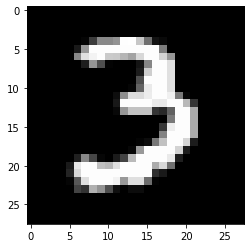

In [62]:
# Print the array image
three = three.values.reshape(28,28)
plt.imshow(three, cmap='gray')

In [63]:
#visualize the array
print(three[5:-5, 5:-5])

[[  0  25 152 253 253 253 253 253 253 253 253 253 124   0   0   0   0   0]
 [  0 135 225 244 253 202 200 181 164 216 253 253 211 151   0   0   0   0]
 [  0   0  30 149  78   3   0   0   0  20 134 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  28 206 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  78 253 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5  99 234 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0  14 142 220 219 236 253 253 240 121   7   0   0]
 [  0   0   0   0   0   0  24 253 253 253 253 235 233 253 253 185  53   0]
 [  0   0   0   0   0   0   8 150 194 194 194  53  40  97 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 122 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 237 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 130 253 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   4  12 120 193 253 253 214  28   0]
 [  0   0   0   0   0   0

In [64]:
# summarise the count of label to see how many labels of each digit is present 
digits.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [65]:
# Summarise the count in percentage 
round(digits.label.astype('category').value_counts()/len(digits.index)*100, 4)

1    11.1524
7    10.4786
3    10.3595
9     9.9714
2     9.9452
6     9.8500
0     9.8381
4     9.6952
8     9.6738
5     9.0357
Name: label, dtype: float64

- Each digit has an approximate value of around 9-11% in the dataset and hence the dataset is balanced. Hence we can very well go ahead with SVM as our choice of model

In [66]:
#describe the dataset
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Rescaling the data

In [67]:
from sklearn.preprocessing import scale 
X = digits.drop('label', axis=1)
y = digits['label'] 

X = scale(X)

In [68]:
# Split the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=0.9, random_state=100)

- Since the training dataset is quite large (42,000 labelled images), it would take a lot of time for training an SVM on the full MNIST data, it can be sub-sampled training (10-20% of the data should be enough to achieve decent accuracy).
- Also, running a GridSearchCV() may take hours if we use large value of k (fold-CV) such as 10 and a wide range of hyperparameters; k = 5 should be sufficient.
 

In [69]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(37800, 784)
(37800,)
(4200, 784)
(4200,)


### Model Building

- Lets try building the linear model with default hyperparameters

In [70]:
from sklearn.svm import SVC 

linear_model = SVC(kernel='linear') 

linear_model.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
# Prediction 
y_pred = linear_model.predict(X_test)

In [72]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[3560,    0,   17,   15,   14,   41,   49,    8,   11,    2],
       [   0, 4139,   25,   13,    2,   16,    5,   11,   25,    3],
       [  50,   26, 3361,   76,   64,   11,   50,   39,   68,   10],
       [  26,   24,  113, 3442,    8,  140,    8,   41,  101,   22],
       [  13,   20,   28,    8, 3378,   11,   21,   13,   11,  155],
       [  33,   35,   40,  196,   37, 2954,   59,    7,   63,   21],
       [  49,   13,   51,    9,   34,   48, 3495,    0,    7,    0],
       [   4,   38,   42,   34,   69,    4,    2, 3602,    7,  130],
       [  33,   93,   95,  148,   28,  107,   36,   31, 3028,   46],
       [  27,   18,   24,   58,  177,   21,    1,  175,   29, 3248]])

- Confusion matrix is showing 10 * 10 array, because, there are 10 classifications in the model. 

In [73]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9049470899470899

- Overall accuracy of linear model is 90%

In [74]:
# Let's check the class wise accuracy 
from sklearn.metrics import classification_report 
class_wise_report = classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3717
           1       0.94      0.98      0.96      4239
           2       0.89      0.90      0.89      3755
           3       0.86      0.88      0.87      3925
           4       0.89      0.92      0.90      3658
           5       0.88      0.86      0.87      3445
           6       0.94      0.94      0.94      3706
           7       0.92      0.92      0.92      3932
           8       0.90      0.83      0.87      3645
           9       0.89      0.86      0.88      3778

    accuracy                           0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



In [75]:
import gc
gc.collect()

4846

### Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [76]:
# rbf kernel with other hyperparameters kept to default 

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [77]:
# predict
predictions = svm_rbf.predict(X_test)

# accuracy 
print(accuracy_score(y_true=y_test, y_pred=predictions))

0.9163227513227513


The accuracy achieved with a non-linear kernel is slightly higher than a linear one. Let's now do a grid search CV to tune the hyperparameters C and gamma.

### Grid Search Cross-Validation

In [78]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [79]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,19.451374,0.367787,3.188463,0.035424,1,0.01,"{'C': 1, 'gamma': 0.01}",0.725000,0.726190,0.708333,0.723810,0.682143,0.713095,0.016785,9
1,5.891897,0.041040,1.934483,0.050763,1,0.001,"{'C': 1, 'gamma': 0.001}",0.922619,0.934524,0.901190,0.903571,0.923810,0.917143,0.012769,3
2,8.955460,0.050329,2.701593,0.034979,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.880952,0.895238,0.876190,0.878571,0.883333,0.882857,0.006633,6
3,19.806081,0.223667,3.305326,0.193981,10,0.01,"{'C': 10, 'gamma': 0.01}",0.747619,0.750000,0.729762,0.739286,0.707143,0.734762,0.015529,7
4,5.002402,0.050179,1.660530,0.035143,10,0.001,"{'C': 10, 'gamma': 0.001}",0.935714,0.939286,0.905952,0.915476,0.934524,0.926190,0.013084,2
5,4.040841,0.041570,1.528343,0.031380,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.919048,0.932143,0.900000,0.908333,0.923810,0.916667,0.011344,4
6,19.645269,0.056375,3.194759,0.024039,100,0.01,"{'C': 100, 'gamma': 0.01}",0.747619,0.750000,0.729762,0.739286,0.707143,0.734762,0.015529,7
7,5.172896,0.266861,1.744798,0.101970,100,0.001,"{'C': 100, 'gamma': 0.001}",0.934524,0.940476,0.907143,0.917857,0.935714,0.927143,0.012585,1
8,3.615347,0.548068,1.665609,0.149114,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.920238,0.927381,0.901190,0.905952,0.925000,0.915952,0.010476,5


KeyError: 'mean_train_score'

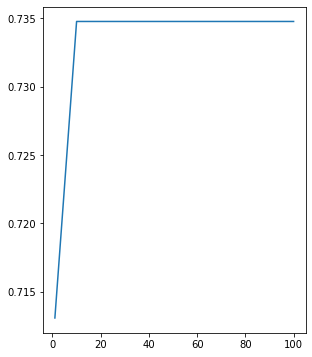

In [80]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

From the plot above, we can observe that (from higher to lower gamma / left to right):
- At very high gamma (0.01), the model is achieving 100% accuracy on the training data, though the test score is quite low (<75%). Thus, the model is overfitting.

- At gamma=0.001, the training and test scores are comparable at around C=1, though the model starts to overfit at higher values of C

- At gamma=0.0001, the model does not overfit till C=10 but starts showing signs at C=100. Also, the training and test scores are slightly lower than at gamma=0.001.

Thus, it seems that the best combination is gamma=0.001 and C=1 (the plot in the middle), which gives the highest test accuracy (~92%) while avoiding overfitting.

Let's now build the final model and see the performance on test data.

### Final Model

Let's now build the final model with chosen hyperparameters.

In [ ]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(X_train, y_train)

In [ ]:
# predict
predictions = svm_final.predict(X_test)

In [ ]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)


### Conclusion

The final accuracy on test data is approx. 92%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just 10% of that!). 

